<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/11_07_2024_cleaning_and_eda_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pydantic-settings

In [9]:
!pip install pandas-profiling[notebook,html]
!pip install pydantic-settings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline

In [11]:
data = pd.read_csv('/content/loan.csv')
df = pd.DataFrame(data)
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,1.0,Working,Sales staff,Semi-Urban,72809.58,...,809.440000,0,Rural,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-23855,Nathalie Olivier,M,43,2361.56,1.0,Working,Laborers,Semi-Urban,152561.34,...,637.290000,0,Semi-Urban,227,2361.56,1,Semi-Urban,1,221050.80,0.00
2,C-24944,Barbie Goetsch,M,18,1546.17,1.0,Working,Laborers,Rural,42091.29,...,613.240000,0,Urban,883,1546.17,2,Urban,1,67993.43,0.00
3,C-40801,Laree Staton,M,18,2416.86,1.0,State servant,Core staff,Semi-Urban,25765.72,...,652.410000,0,Rural,325,2416.86,2,Rural,1,32423.71,16747.72
4,C-37677,Xenia Browder,F,39,2719.74,1.0,Commercial associate,High skill tech staff,Semi-Urban,20879.96,...,646.210000,0,Rural,196,2719.74,2,Rural,0,33568.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17843,C-29993,Levi Guider,M,62,1834.22,1.0,Pensioner,Laborers,Semi-Urban,89484.00,...,739.889149,0,Semi-Urban,407,1834.22,2,Semi-Urban,0,164726.89,68992.11
17844,C-29555,Magdalena Hu,F,37,3513.48,1.0,State servant,Laborers,Semi-Urban,78208.24,...,869.610000,0,Urban,389,2223.81,2,Urban,1,144867.54,46616.60
17845,C-35437,Antonio Binder,F,18,1637.24,1.0,Working,High skill tech staff,Semi-Urban,115975.08,...,729.410000,0,Rural,538,1637.24,3,Rural,1,160826.31,61057.56
17846,C-9552,Jonathon Leitner,F,36,1572.88,1.0,Commercial associate,Laborers,Rural,176348.06,...,739.889149,0,Rural,176,1572.88,3,Rural,1,307855.67,99766.87


In [10]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

In [12]:
# Calculation of the Spearman correlation
target = 'Age'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

ValueError: could not convert string to float: 'C-36995'

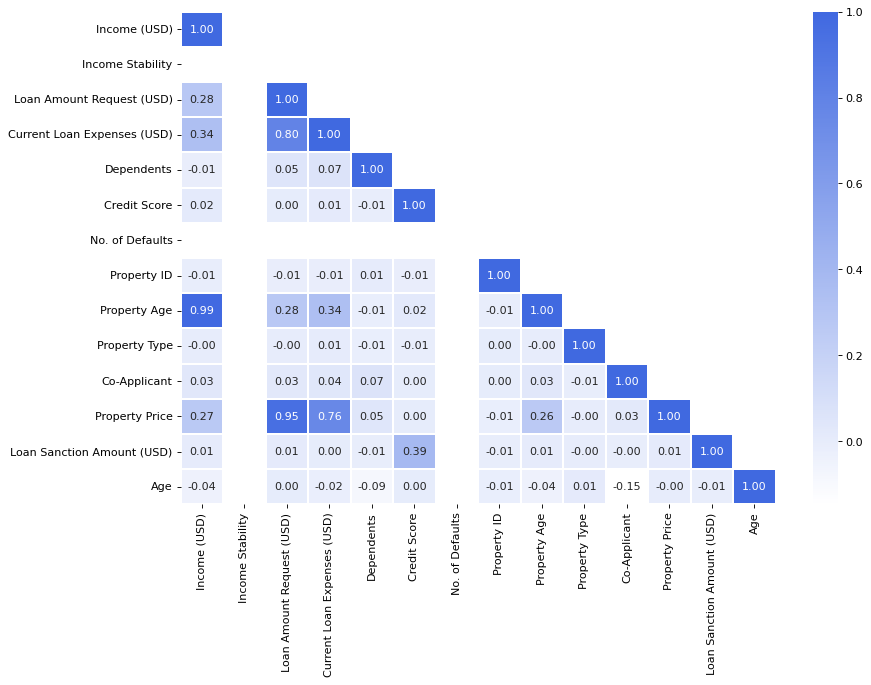

In [13]:
# Calculation of the Spearman correlation
target = 'Age'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)

# Select only numerical columns for correlation calculation
numerical_df = df_ordered.select_dtypes(include=['number'])
corr = numerical_df.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()

In [15]:
df[df['Loan Sanction Amount (USD)']<0]['Loan Sanction Amount (USD)'].count()#negative values

214

In [16]:
df[df['Loan Sanction Amount (USD)']<0]['Loan Sanction Amount (USD)'].value_counts()

Loan Sanction Amount (USD)
-999.000000    213
-56.184222       1
Name: count, dtype: int64

In [17]:
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].apply(abs)

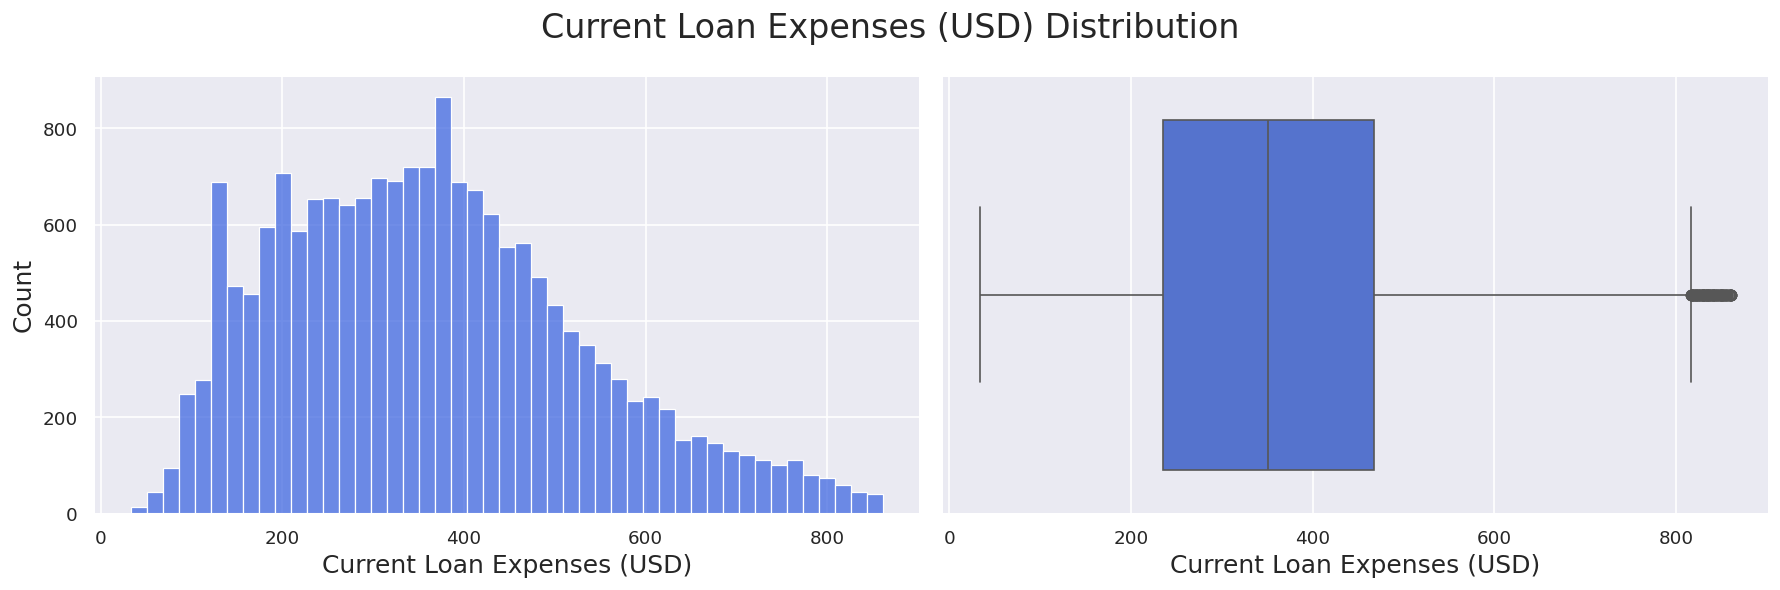

In [18]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Current Loan Expenses (USD)', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Current Loan Expenses (USD)', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Current Loan Expenses (USD) Distribution', fontsize=20)
plt.tight_layout()
plt.show()

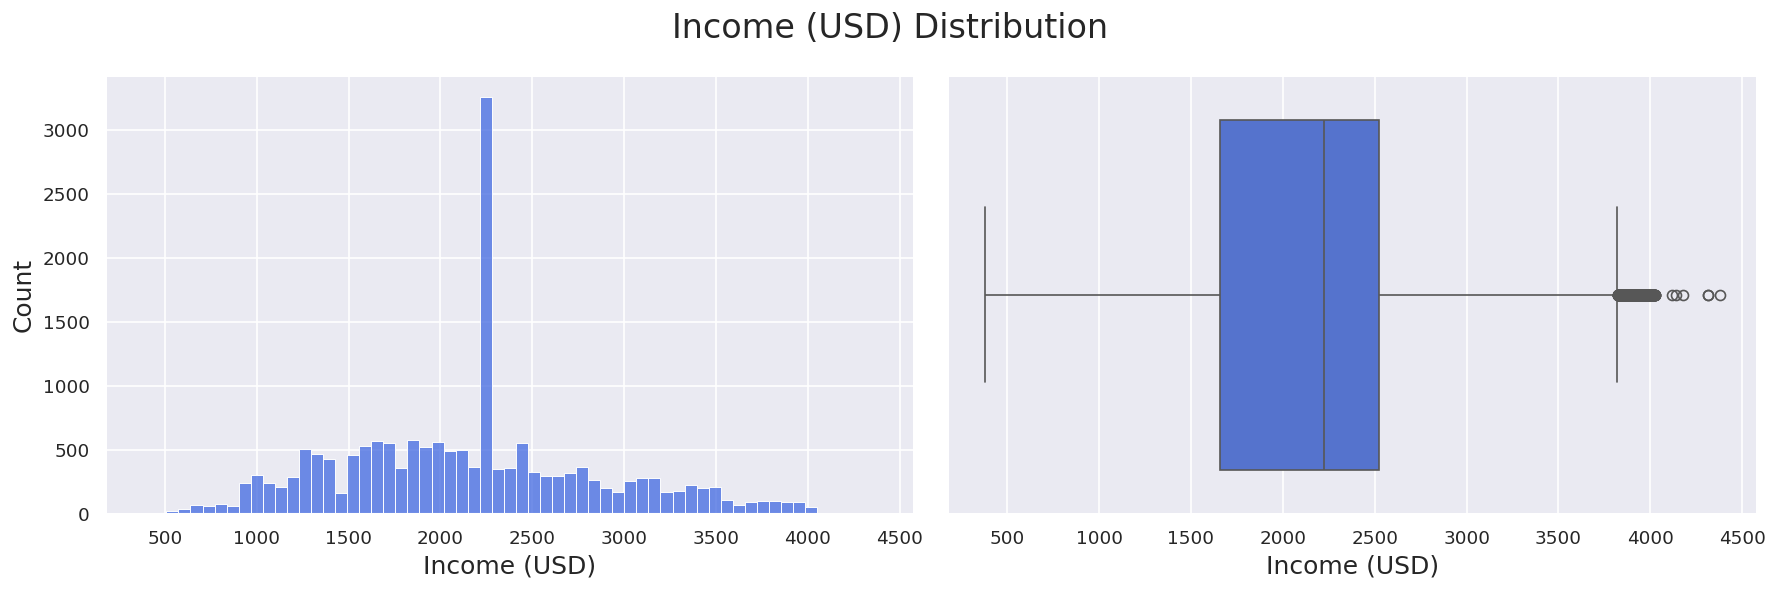

In [23]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Income (USD)', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Income (USD)', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Income (USD) Distribution', fontsize=20)
plt.tight_layout()
plt.show()